## Self-RAG

This notebook implements Self-RAG (Self-Reflective Retrieval-Augmented Generation), which combines:
- Document relevance grading
- Hallucination detection
- Answer completeness checking
- Query rewriting for better retrieval

Flow:
1. Query -> Retrieve -> Grade documents
2. If relevant -> Generate -> Check hallucinations -> Check answer quality
3. If not relevant -> Transform query -> Retrieve again
4. If hallucinations -> Regenerate
5. If doesn't answer query -> Transform query -> Retrieve again

https://arxiv.org/abs/2310.11511

🔗 Join the Discord Community: https://discord.gg/RFjwbkNa


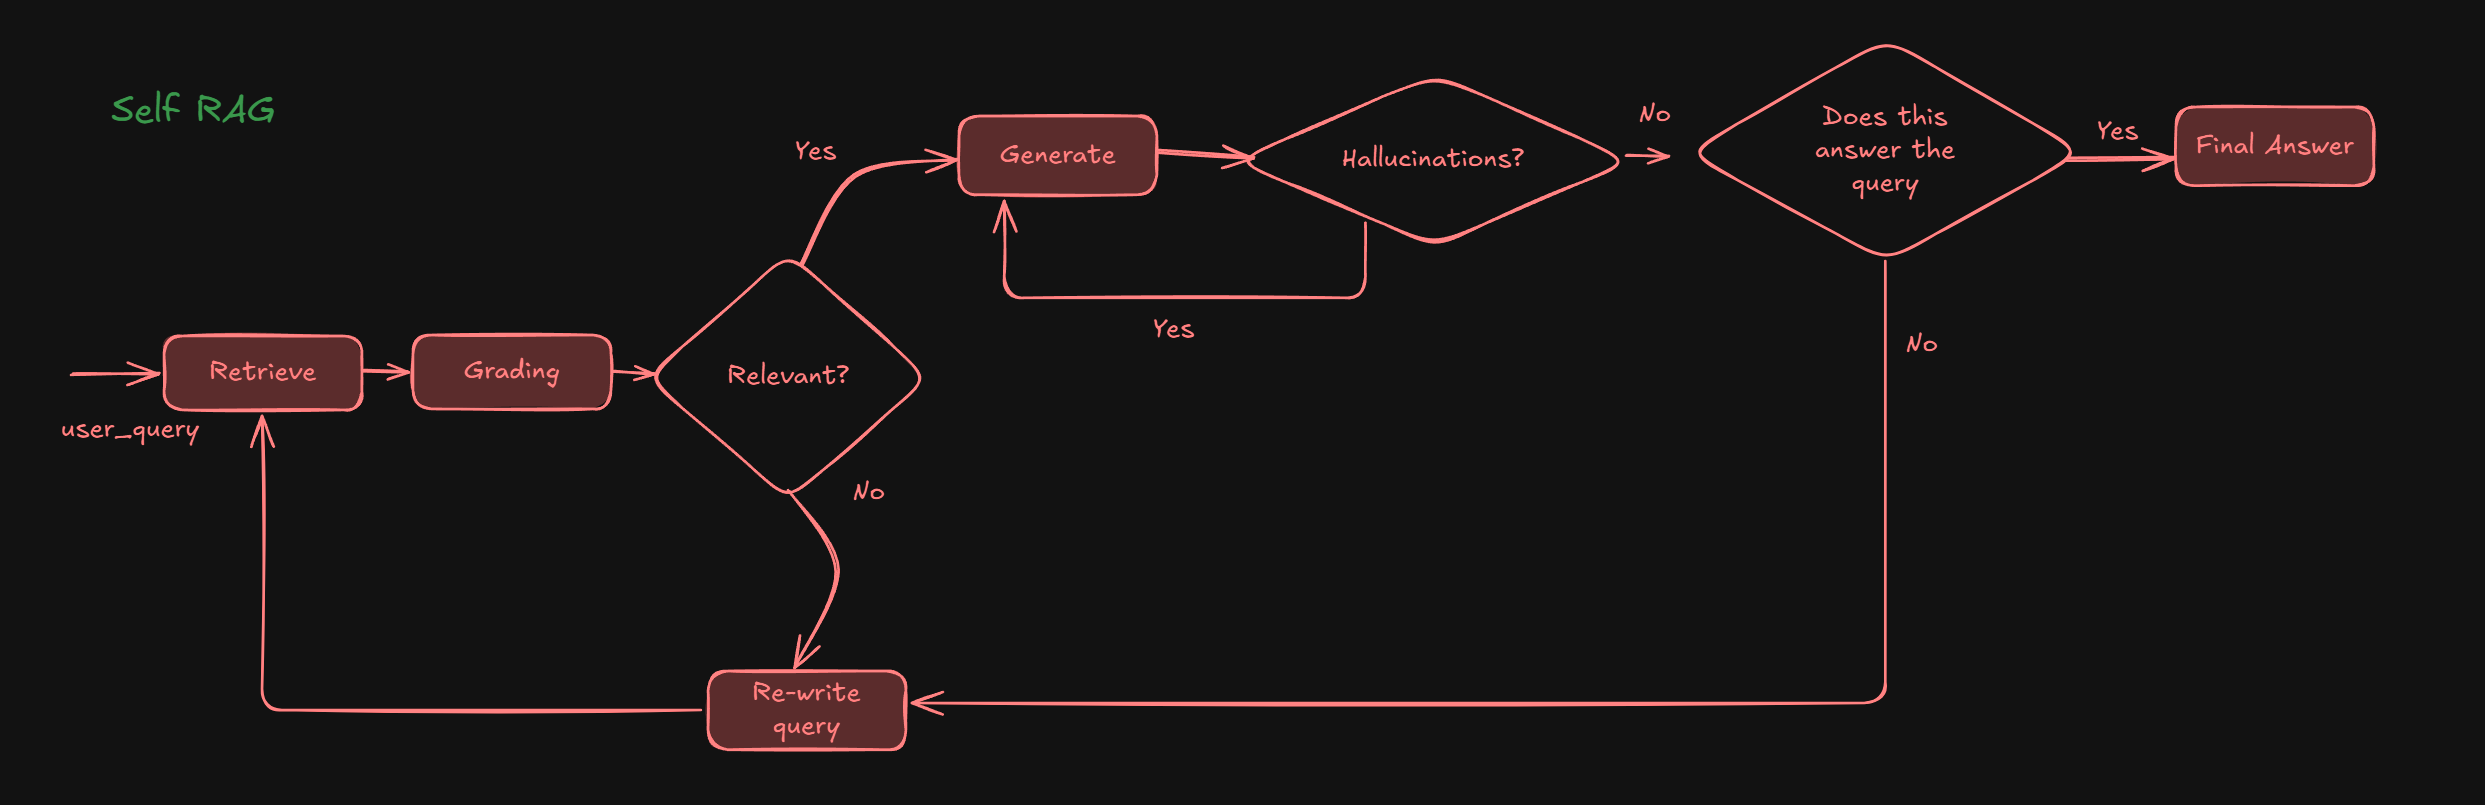

In [1]:
from typing_extensions import TypedDict, Annotated
from typing import List
import os
import operator

from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, SystemMessage
from pydantic import BaseModel, Field

from scripts import my_tools

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# =============================================================================
# Configuration
# =============================================================================

LLM_MODEL = "qwen3"
BASE_URL = "http://localhost:11434"

llm = ChatOllama(model=LLM_MODEL, base_url=BASE_URL, reasoning=True)

In [4]:
result = llm.invoke('hi')
result.pretty_print()

================================== Ai Message ==================================

Hello! How can I assist you today? 😊


In [8]:
print(result.additional_kwargs['reasoning_content'])

Okay, the user said "hi /think". Let me see. They might be testing if I can handle the /think command. I should respond politely and ask how I can assist them. Maybe they want to start a conversation or need help with something. I'll keep it friendly and open-ended. Let me make sure my response is natural and not robotic. Alright, time to reply.



In [9]:
# =============================================================================
# Pydantic Schemas for Structured Outputs
# =============================================================================
class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""
    binary_score: str = Field(description="Documents are relevant to the query, 'yes' or 'no'")


class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""
    binary_score: str = Field(description="Answer is grounded with the facts for the query, 'yes' or 'no'")


class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses query."""
    binary_score: str = Field(description="Answer addresses the query, 'yes' or 'no'")


class SearchQueries(BaseModel):
    """Search queries for retrieving missing information."""
    search_queries: list[str] = Field(description="1-3 search queries to retrieve the missing information.")


In [10]:
# =============================================================================
# State
# =============================================================================
class AgentState(TypedDict):
    messages: Annotated[List, operator.add]
    query: str
    documents: str
    filtered_documents: str
    rewritten_queries: List[str]

### LangGraph Nodes

In [ ]:
# =============================================================================
# LangGraph Nodes
# =============================================================================

# Retrieve documents based on user query

def retrieve_node(state: AgentState):

    print("[RETRIEVE] Fetching documents.")

    quer

In [ ]:
# Grade document relevance and filter out irrelevant ones


In [ ]:
# Generate answer based on retrieved documents


In [ ]:
# Transform the query to produce better search queries


### Router Logic

In [ ]:
# =============================================================================
# Router Logic
# =============================================================================

# Decide whether to generate answer or transform query


In [ ]:
# Check for hallucinations and whether answer addresses query


### Build Graph

In [ ]:
# =============================================================================
# Build Graph
# =============================================================================


In [ ]:
# =============================================================================
# Demo
# =============================================================================
query = "What was Amazon's revenue in 2023?"


In [ ]:
query = "Compare Apple and Amazon revenue in 2024 q1"



In [ ]:
query = "What was Google's revenue in 2023?"

